In [100]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [101]:
# Create a set of random latitude and longitude combinations.
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [102]:
# Add the latitudes and longitudes to a list.
coordinates=list(lat_lngs)

In [103]:
# Import the citypy
from citipy import citipy 

In [104]:
# Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


592

In [105]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

In [106]:
# Starting URL for Weather Map API Call.
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [107]:
# Create an endpoint url for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 63.88,
  'feels_like': 63.73,
  'temp_min': 58.62,
  'temp_max': 66.79,
  'pressure': 1010,
  'humidity': 80},
 'visibility': 9230,
 'wind': {'speed': 1.99, 'deg': 273, 'gust': 8.01},
 'clouds': {'all': 78},
 'dt': 1632828906,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1632825491,
  'sunset': 1632868279},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [108]:
# Get the JSON data.
boston_data=city_weather.json()

In [109]:
boston_data["sys"]["country"]

'US'

In [110]:
boston_data["dt"]

1632828906

In [111]:
lat=boston_data["coord"]["lat"]
lng=boston_data["coord"]["lon"]
max_temp=boston_data["main"]["temp_max"]
humidity=boston_data["main"]["humidity"]
clouds=boston_data["clouds"]["all"]
wind=boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 66.79 80 78 1.99


In [112]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date=boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-09-28 11:35:06'

In [113]:
# Loop through all the cities in our list.
#for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >=50):
#        set_count += 1
#        record_count = 1
    # Create endpoint URL with each city.
#    city_url = url = "&q=" + cities[i]
print(cities)

['baft', 'busselton', 'souillac', 'port alfred', 'kruisfontein', 'taolanaro', 'tautira', 'petropavlovsk-kamchatskiy', 'ushuaia', 'tuktoyaktuk', 'saint-philippe', 'faanui', 'vaini', 'hobart', 'albany', 'bathsheba', 'rikitea', 'oxford', 'los llanos de aridane', 'port elizabeth', 'mataura', 'bluff', 'dikson', 'punta arenas', 'zharkovskiy', 'mandalgovi', 'grindavik', 'torbay', 'elat', 'temyasovo', 'yellowknife', 'yar-sale', 'payakumbuh', 'luderitz', 'belushya guba', 'saskylakh', 'nanlong', 'qaanaaq', 'port hedland', 'abu samrah', 'kuva', 'puerto quijarro', 'agirish', 'hilo', 'state college', 'santa lucia', 'ures', 'koboldo', 'isangel', 'jamestown', 'fort saint john', 'vestmanna', 'codrington', 'bethel', 'hermanus', 'alpena', 'vestmannaeyjar', 'saldanha', 'pangai', 'alihe', 'attawapiskat', 'aknalich', 'illoqqortoormiut', 'laguna', 'sitka', 'georgetown', 'hasaki', 'khor', 'barrow', 'khatanga', 'bredasdorp', 'beloha', 'matay', 'guerrero negro', 'norman wells', 'skagastrond', 'dingle', 'marawi

In [119]:
# Create an empty list to hold the weather data.
city_data=[]
# Print the beginning of the logging.
print("Beginning Data Retrieval   ")
print("---------------------------")

# Create counters.
record_count=1
set_count=1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1

# Run and API request for each of the cities.
    try:
        # Parse the JSON and retieve data.
        city_weather=requests.get(city_url).json()
        # Parse out the needed data.
        city_lat=city_weather["coord"]["lat"]
        city_lng=city_weather["coord"]["lon"]
        city_max_temp=city_weather["main"]["temp_max"]
        city_humidity=city_weather["main"]["humidity"]
        city_clouds=city_weather["clouds"]["all"]
        city_wind=city_weather["wind"]["speed"]
        city_country=city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date=datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City":city.title(), "Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp, "Humidity": city_humidity, "Cloudiness": city_clouds, "Wind Speed": city_wind, "Country": city_country, "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate the Data Loading is complete.
print("--------------------------")
print("Data Retrieval Complete   ")
print("--------------------------")
        

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | baft
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | souillac
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | kruisfontein
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | tautira
Processing Record 8 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | faanui
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | bathsheba
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | oxford
Processing Record 19 of Set 1 | los llanos de aridane
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 

Processing Record 36 of Set 4 | sao filipe
Processing Record 37 of Set 4 | midland
Processing Record 38 of Set 4 | nanortalik
Processing Record 39 of Set 4 | malkangiri
Processing Record 40 of Set 4 | evensk
Processing Record 41 of Set 4 | sola
Processing Record 42 of Set 4 | korisos
Processing Record 43 of Set 4 | mount gambier
Processing Record 44 of Set 4 | salalah
Processing Record 45 of Set 4 | izhma
Processing Record 46 of Set 4 | krasnyy tekstilshchik
City not found. Skipping...
Processing Record 47 of Set 4 | east london
Processing Record 48 of Set 4 | port hardy
Processing Record 49 of Set 4 | hermiston
Processing Record 50 of Set 4 | alice springs
Processing Record 1 of Set 5 | clyde river
Processing Record 2 of Set 5 | morogoro
Processing Record 3 of Set 5 | necochea
Processing Record 4 of Set 5 | owase
Processing Record 5 of Set 5 | rungata
City not found. Skipping...
Processing Record 6 of Set 5 | ola
Processing Record 7 of Set 5 | biloela
Processing Record 8 of Set 5 | mu

Processing Record 25 of Set 8 | kavieng
Processing Record 26 of Set 8 | joniskis
Processing Record 27 of Set 8 | tangshan
Processing Record 28 of Set 8 | najran
Processing Record 29 of Set 8 | wasilla
Processing Record 30 of Set 8 | behshahr
Processing Record 31 of Set 8 | goderich
Processing Record 32 of Set 8 | sebinkarahisar
Processing Record 33 of Set 8 | saint-augustin
Processing Record 34 of Set 8 | harper
Processing Record 35 of Set 8 | rio cuarto
Processing Record 36 of Set 8 | cayenne
Processing Record 37 of Set 8 | mwinilunga
Processing Record 38 of Set 8 | mendi
Processing Record 39 of Set 8 | jacareacanga
Processing Record 40 of Set 8 | tres lagoas
Processing Record 41 of Set 8 | tilichiki
Processing Record 42 of Set 8 | hurricane
Processing Record 43 of Set 8 | isiro
Processing Record 44 of Set 8 | sisimiut
Processing Record 45 of Set 8 | huntsville
Processing Record 46 of Set 8 | mahebourg
Processing Record 47 of Set 8 | la romana
Processing Record 48 of Set 8 | rurrenaba

Processing Record 15 of Set 12 | achisay
City not found. Skipping...
Processing Record 16 of Set 12 | south yuba city
Processing Record 17 of Set 12 | klyuchi
Processing Record 18 of Set 12 | qinhuangdao
Processing Record 19 of Set 12 | yumen
Processing Record 20 of Set 12 | marsaxlokk
Processing Record 21 of Set 12 | akureyri
Processing Record 22 of Set 12 | novo aripuana
Processing Record 23 of Set 12 | batouri
Processing Record 24 of Set 12 | juventino rosas
Processing Record 25 of Set 12 | pochutla
Processing Record 26 of Set 12 | tecoanapa
Processing Record 27 of Set 12 | warrnambool
Processing Record 28 of Set 12 | soanierana ivongo
Processing Record 29 of Set 12 | rawah
Processing Record 30 of Set 12 | kimbe
Processing Record 31 of Set 12 | chinsali
Processing Record 32 of Set 12 | fairview
Processing Record 33 of Set 12 | denpasar
Processing Record 34 of Set 12 | port augusta
Processing Record 35 of Set 12 | chumikan
Processing Record 36 of Set 12 | biak
Processing Record 37 of

In [121]:
len(city_data)

538

In [122]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Baft,29.2340,56.6057,80.22,14,2,11.07,IR,2021-09-28 11:38:36
1,Busselton,-33.6500,115.3333,60.08,76,99,7.16,AU,2021-09-28 11:38:37
2,Souillac,-20.5167,57.5167,76.35,64,75,13.80,MU,2021-09-28 11:38:37
3,Port Alfred,-33.5906,26.8910,65.26,65,98,14.97,ZA,2021-09-28 11:38:37
4,Kruisfontein,-34.0033,24.7314,65.88,54,99,15.57,ZA,2021-09-28 11:38:37
5,Tautira,-17.7333,-149.1500,73.42,79,11,16.67,PF,2021-09-28 11:38:38
6,Petropavlovsk-Kamchatskiy,53.0452,158.6483,43.39,81,0,4.47,RU,2021-09-28 11:38:38
7,Ushuaia,-54.8000,-68.3000,37.06,70,75,2.30,AR,2021-09-28 11:38:38
8,Tuktoyaktuk,69.4541,-133.0374,26.82,88,100,6.22,CA,2021-09-28 11:38:39
9,Saint-Philippe,-21.3585,55.7679,78.39,77,14,15.37,RE,2021-09-28 11:38:39


In [123]:
# Assing new column order
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Baft,IR,2021-09-28 11:38:36,29.2340,56.6057,80.22,14,2,11.07
1,Busselton,AU,2021-09-28 11:38:37,-33.6500,115.3333,60.08,76,99,7.16
2,Souillac,MU,2021-09-28 11:38:37,-20.5167,57.5167,76.35,64,75,13.80
3,Port Alfred,ZA,2021-09-28 11:38:37,-33.5906,26.8910,65.26,65,98,14.97
4,Kruisfontein,ZA,2021-09-28 11:38:37,-34.0033,24.7314,65.88,54,99,15.57
...,...,...,...,...,...,...,...,...,...
533,Biak,ID,2021-09-28 11:41:14,-0.9131,122.8766,76.87,84,83,5.55
534,Thung Song,TH,2021-09-28 11:41:15,8.1645,99.6804,81.79,90,95,1.50
535,Yulara,AU,2021-09-28 11:41:15,-25.2406,130.9889,75.04,13,12,8.05
536,Havelock,US,2021-09-28 11:41:15,34.8791,-76.9013,71.94,91,1,1.99


In [126]:
# Created the output file (CSV)
output_data_file="weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [129]:
# Extract relevant fields from the DataFrame for plotting
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

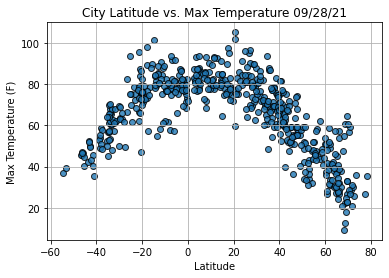

In [135]:
# Import the time module.
import time

# Build the scatter plot for latitued vs. max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
            
# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()
            

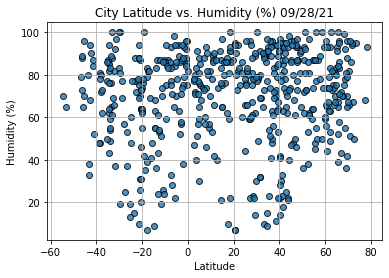

In [145]:
# Build the scatter plot for latitued vs. humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%) "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
            
# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

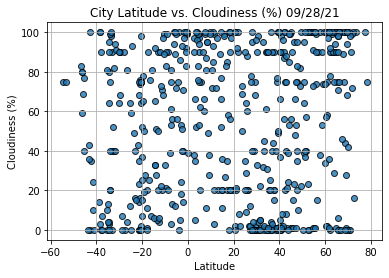

In [146]:
# Build the scatter plot for latitued vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
            
# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

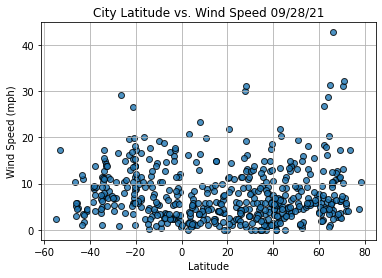

In [147]:
# Build the scatter plot for latitued vs. wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
            
# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [150]:
index13=city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2021-09-28 11:38:40
Lat                       42.6001
Lng                      -73.9662
Max Temp                    62.58
Humidity                       90
Cloudiness                    100
Wind Speed                   1.86
Name: 13, dtype: object

In [172]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err)=linregress(x_values, y_values)
    
    # Calculated the regression line "y values" from the slope and intercept.
    regress_values=x_values * slope + intercept
    # Get the equations of the line.
    line_eq="y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the test for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [173]:
# Create Nothern and Southern Hemisphere DataFrames.
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<0)]


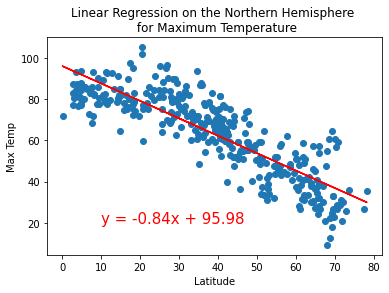

In [186]:
# Linear regression on the Northern Hemisphere for max temperature
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,20))


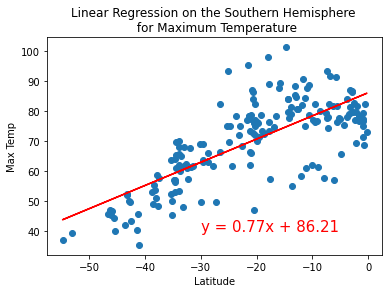

In [187]:
# Linear regression on the Southern Hemisphere for max temperature
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-30,40))


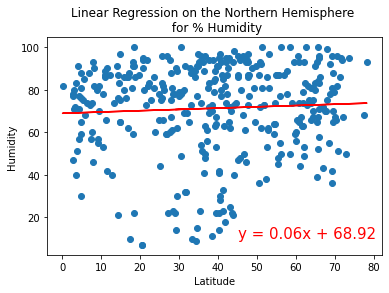

In [191]:
# Linear regression on the Northern Hemisphere for % humidity
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', 'Humidity', (45,10))


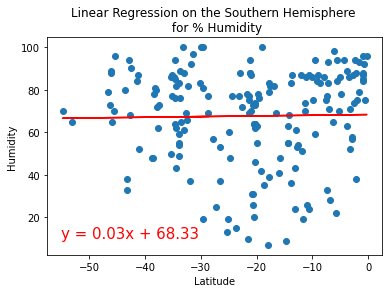

In [193]:
# Linear regression on the Southern Hemisphere for % humidity
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', 'Humidity', (-55,10))


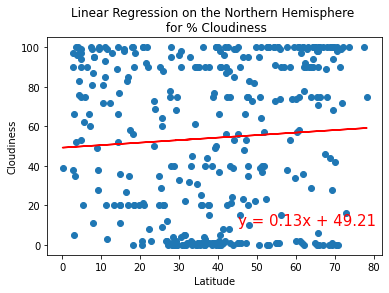

In [198]:
# Linear regression on the Northern Hemisphere for % cloudiness
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness', (45,10))


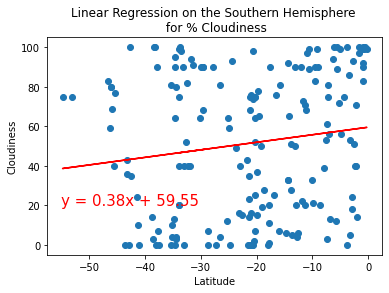

In [197]:
# Linear regression on the Southern Hemisphere for % cloudiness
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 'Cloudiness', (-55,20))


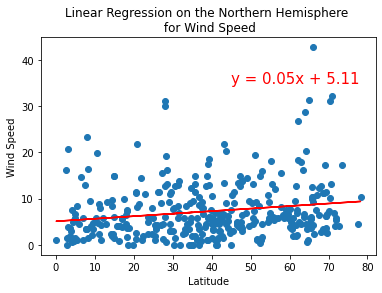

In [201]:
# Linear regression on the Northern Hemisphere for wind speed
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed', (45,35))


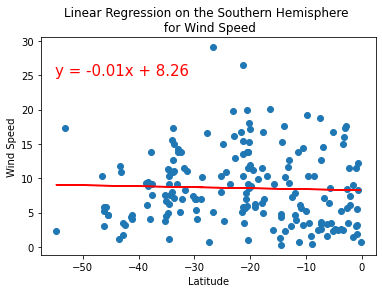

In [203]:
# Linear regression on the Southern Hemisphere for wind speed
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-55,25))
